In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay

In [2]:
df=pd.read_csv('/content/email_phishing dataset.csv')
df

,num_words,num_unique_words,num_stopwords,num_links,num_unique_domains,num_email_addresses,num_spelling_errors,num_urgent_keywords,label
0,140.0,94,52,0,0,0,0,0,0
1,5.0,5,1,0,0,0,0,0,0
2,34.0,32,15,0,0,0,0,0,0
3,6.0,6,2,0,0,0,0,0,0
4,9.0,9,2,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
524841,782.0,327,301,2,2,2,52,1,0
524842,36.0,30,11,0,0,0,4,0,1
524843,61.0,46,11,0,0,0,3,0,0
524844,213.0,136,89,0,0,0,18,0,0


In [3]:
df.head()

,num_words,num_unique_words,num_stopwords,num_links,num_unique_domains,num_email_addresses,num_spelling_errors,num_urgent_keywords,label
0,140.0,94,52,0,0,0,0,0,0
1,5.0,5,1,0,0,0,0,0,0
2,34.0,32,15,0,0,0,0,0,0
3,6.0,6,2,0,0,0,0,0,0
4,9.0,9,2,0,0,0,0,0,0


In [4]:
df.tail()

,num_words,num_unique_words,num_stopwords,num_links,num_unique_domains,num_email_addresses,num_spelling_errors,num_urgent_keywords,label
524841,782.0,327,301,2,2,2,52,1,0
524842,36.0,30,11,0,0,0,4,0,1
524843,61.0,46,11,0,0,0,3,0,0
524844,213.0,136,89,0,0,0,18,0,0
524845,26.0,24,3,0,0,0,2,0,0


In [5]:
df.describe()

,num_words,num_unique_words,num_stopwords,num_links,num_unique_domains,num_email_addresses,num_spelling_errors,num_urgent_keywords,label
count,4.986040e+05,524846.000000,524846.000000,524846.000000,524846.000000,524846.000000,524846.000000,524846.000000,524846.000000
mean,2.763339e+02,123.012167,80.045465,0.895588,0.347767,2.114897,24.694731,0.245301,0.013240
std,3.416371e+03,201.626478,1023.330380,5.603001,1.774209,13.592682,311.312358,0.559320,0.114301
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.700000e+01,38.000000,12.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
50%,1.200000e+02,79.000000,34.000000,0.000000,0.000000,0.000000,8.000000,0.000000,0.000000
75%,2.680000e+02,145.000000,79.000000,0.000000,0.000000,1.000000,22.000000,0.000000,0.000000
max,2.339682e+06,51251.000000,720411.000000,824.000000,524.000000,1150.000000,190104.000000,7.000000,1.000000


In [6]:
df.isna().sum()

,0
num_words,26242
num_unique_words,0
num_stopwords,0
num_links,0
num_unique_domains,0
num_email_addresses,0
num_spelling_errors,0
num_urgent_keywords,0
label,0


In [7]:
df.dropna(inplace=True)

In [8]:
df['num_words']=df['num_words'].fillna(df['num_words'].mean())
df

,num_words,num_unique_words,num_stopwords,num_links,num_unique_domains,num_email_addresses,num_spelling_errors,num_urgent_keywords,label
0,140.0,94,52,0,0,0,0,0,0
1,5.0,5,1,0,0,0,0,0,0
2,34.0,32,15,0,0,0,0,0,0
3,6.0,6,2,0,0,0,0,0,0
4,9.0,9,2,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
524841,782.0,327,301,2,2,2,52,1,0
524842,36.0,30,11,0,0,0,4,0,1
524843,61.0,46,11,0,0,0,3,0,0
524844,213.0,136,89,0,0,0,18,0,0


In [9]:
df.isna().sum()

,0
num_words,0
num_unique_words,0
num_stopwords,0
num_links,0
num_unique_domains,0
num_email_addresses,0
num_spelling_errors,0
num_urgent_keywords,0
label,0


In [10]:
df.dtypes

,0
num_words,float64
num_unique_words,int64
num_stopwords,int64
num_links,int64
num_unique_domains,int64
num_email_addresses,int64
num_spelling_errors,int64
num_urgent_keywords,int64
label,int64


In [11]:
df['num_words'].value_counts()

,count
num_words,
24.0,5825
11.0,3895
31.0,3402
10.0,3340
5.0,3169
...,...
3886.0,1
3174.0,1
11578.0,1


In [12]:
df['num_unique_words'].value_counts()

,count
num_unique_words,
22,6881
34,4474
32,4346
10,4244
28,4171
...,...
1969,1
1270,1
2280,1


In [13]:
df['num_stopwords'].value_counts()

,count
num_stopwords,
0,11844
7,11592
4,11359
2,10800
3,10360
...,...
1577,1
1922,1
1969,1


In [14]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values


In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
x_train

array([[373., 181., 109., ...,   7.,  32.,   1.],
       [789., 325., 260., ...,   0.,  43.,   1.],
       [149.,  95.,  62., ...,   0.,   5.,   0.],
       ...,
       [149., 112.,  41., ...,   0.,  18.,   0.],
       [291., 135.,  84., ...,   0.,  22.,   0.],
       [177., 102.,  46., ...,   0.,   8.,   1.]])

In [16]:
#preprocessing
scalar=StandardScaler()
scalar.fit(x_train)
x_train=scalar.fit_transform(x_train)
x_test=scalar.fit_transform(x_test)
x_train

array([[ 0.02360476,  0.2788495 ,  0.022944  , ...,  0.35935788,
         0.02030584,  1.34846111],
       [ 0.12644741,  0.97028192,  0.14444352, ..., -0.1550961 ,
         0.05132932,  1.34846111],
       [-0.03177206, -0.1340893 , -0.01487374, ..., -0.1550961 ,
        -0.05584271, -0.43834368],
       ...,
       [-0.03177206, -0.05246187, -0.03177102, ..., -0.1550961 ,
        -0.01917859, -0.43834368],
       [ 0.00333289,  0.05797526,  0.00282818, ..., -0.1550961 ,
        -0.00789733, -0.43834368],
       [-0.02484995, -0.10047801, -0.02774786, ..., -0.1550961 ,
        -0.04738176,  1.34846111]])

In [17]:
model=RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [18]:
y_pred=model.predict(x_test)
y_pred

array([0, 0, 1, ..., 0, 0, 0])

In [19]:
print(accuracy_score(y_test,y_pred))



0.8009720420906259


In [20]:
print("Unique values in y_test:", np.unique(y_test))
print("Unique values in y_pred:", np.unique(y_pred))


Unique values in y_test: [0 1]
Unique values in y_pred: [0 1]


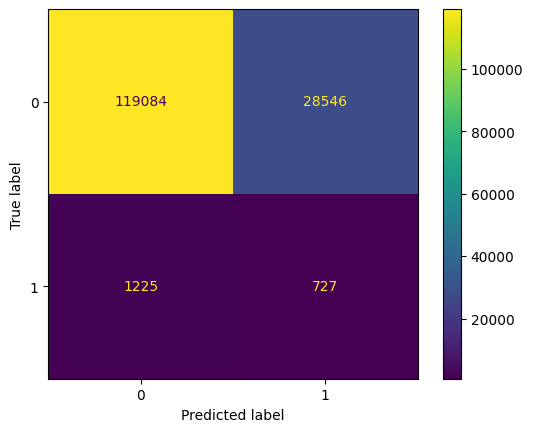

In [21]:
cm=confusion_matrix(y_test,y_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()